In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [2]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [3]:
df=df[df['location']=='India']
df=df[['date','new_cases']]

In [4]:
df

,date,new_cases
21276,2019-12-31,0.0
21277,2020-01-01,0.0
21278,2020-01-02,0.0
21279,2020-01-03,0.0
21280,2020-01-04,0.0
...,...,...
21559,2020-10-09,70496.0
21560,2020-10-10,73272.0
21561,2020-10-11,74383.0
21562,2020-10-12,66732.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


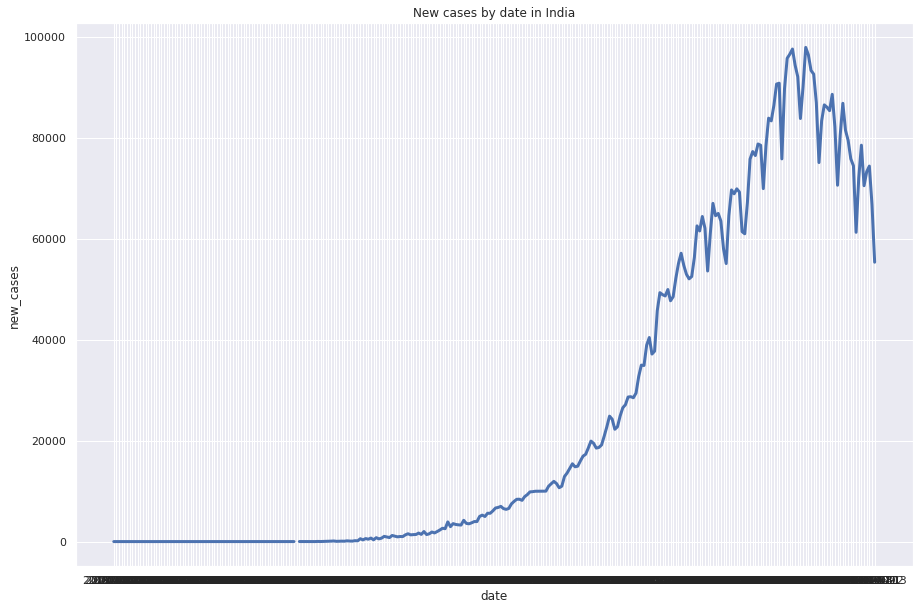

In [19]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in India')
plt.show()

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [20]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [21]:
case_series=case_series.fillna(0)
case_series

,new_cases
21276,0.0
21277,0.0
21278,0.0
21279,0.0
21280,0.0
...,...
21559,70496.0
21560,73272.0
21561,74383.0
21562,66732.0


In [22]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [23]:
timestep=12
X_case, y_case = create_dataset(case_series, timestep)


In [24]:
train_size=int(len(case_series)*0.90)

In [25]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [26]:
n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

#x_case_test=x_case_test.reshape((x_case_test.shape[0], x_case_test.shape[1], n_features))


## **Model preperation:**

In [27]:

model = Sequential()
model.add((LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((LSTM(20,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
9/9 - 0s - loss: 2640153856.0000
Epoch 2/600
9/9 - 0s - loss: 1565917184.0000
Epoch 3/600
9/9 - 0s - loss: 1578618624.0000
Epoch 4/600
9/9 - 0s - loss: 1505152896.0000
Epoch 5/600
9/9 - 0s - loss: 1487272704.0000
Epoch 6/600
9/9 - 0s - loss: 1460070656.0000
Epoch 7/600
9/9 - 0s - loss: 1049239872.0000
Epoch 8/600
9/9 - 0s - loss: 709314176.0000
Epoch 9/600
9/9 - 0s - loss: 341808544.0000
Epoch 10/600
9/9 - 0s - loss: 278435136.0000
Epoch 11/600
9/9 - 0s - loss: 51575288.0000
Epoch 12/600
9/9 - 0s - loss: 40689280.0000
Epoch 13/600
9/9 - 0s - loss: 52450348.0000
Epoch 14/600
9/9 - 0s - loss: 56806980.0000
Epoch 15/600
9/9 - 0s - loss: 98078224.0000
Epoch 16/600
9/9 - 0s - loss: 64621148.0000
Epoch 17/600
9/9 - 0s - loss: 70503536.0000
Epoch 18/600
9/9 - 0s - loss: 59574168.0000
Epoch 19/600
9/9 - 0s - loss: 48620784.0000
Epoch 20/600
9/9 - 0s - loss: 58057968.0000
Epoch 21/600
9/9 - 0s - loss: 207180192.0000
Epoch 22/600
9/9 - 0s - loss: 25973176.0000
Epoch 23/600
9/9 - 0s -

# **Check validation data:**

In [28]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+timestep-15)])

x_input=numpy.array(x_input)



In [29]:
x_input

array([78512., 69921., 78357., 83883., 83341., 86432., 90632., 90802.,
       75809., 89706., 95735., 96551.], dtype=float32)

In [30]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[90284.664]
1 day input [69921.    78357.    83883.    83341.    86432.    90632.    90802.
 75809.    89706.    95735.    96551.    90284.664]
[69921.    78357.    83883.    83341.    86432.    90632.    90802.
 75809.    89706.    95735.    96551.    90284.664]
[[[69921.   ]
  [78357.   ]
  [83883.   ]
  [83341.   ]
  [86432.   ]
  [90632.   ]
  [90802.   ]
  [75809.   ]
  [89706.   ]
  [95735.   ]
  [96551.   ]
  [90284.664]]]
1 day output [[93242.37]]
2 day input [78357.    83883.    83341.    86432.    90632.    90802.    75809.
 89706.    95735.    96551.    90284.664 93242.37 ]
[78357.    83883.    83341.    86432.    90632.    90802.    75809.
 89706.    95735.    96551.    90284.664 93242.37 ]
[[[78357.   ]
  [83883.   ]
  [83341.   ]
  [86432.   ]
  [90632.   ]
  [90802.   ]
  [75809.   ]
  [89706.   ]
  [95735.   ]
  [96551.   ]
  [90284.664]
  [93242.37 ]]]
2 day output [[93375.805]]
3 day input [83883.    83341.    86432.    90632.    90802.    75809.    89706.
 95735.    

In [31]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [32]:
lst_output=numpy.array(lst_output)
lst_output

array([ 90284.664,  93242.37 ,  93375.805,  93512.305,  94405.23 ,
        95268.09 ,  96509.7  ,  96921.3  ,  97912.016,  97141.28 ,
        97929.96 ,  98804.8  ,  99802.93 , 100333.41 , 100992.055,
       101561.35 , 102108.625, 102672.07 , 103261.53 , 104035.28 ,
       104749.414, 105447.375, 106052.734, 106673.88 , 107314.414,
       107996.266, 108686.94 , 109390.43 , 110094.9  ], dtype=float32)

No handles with labels found to put in legend.


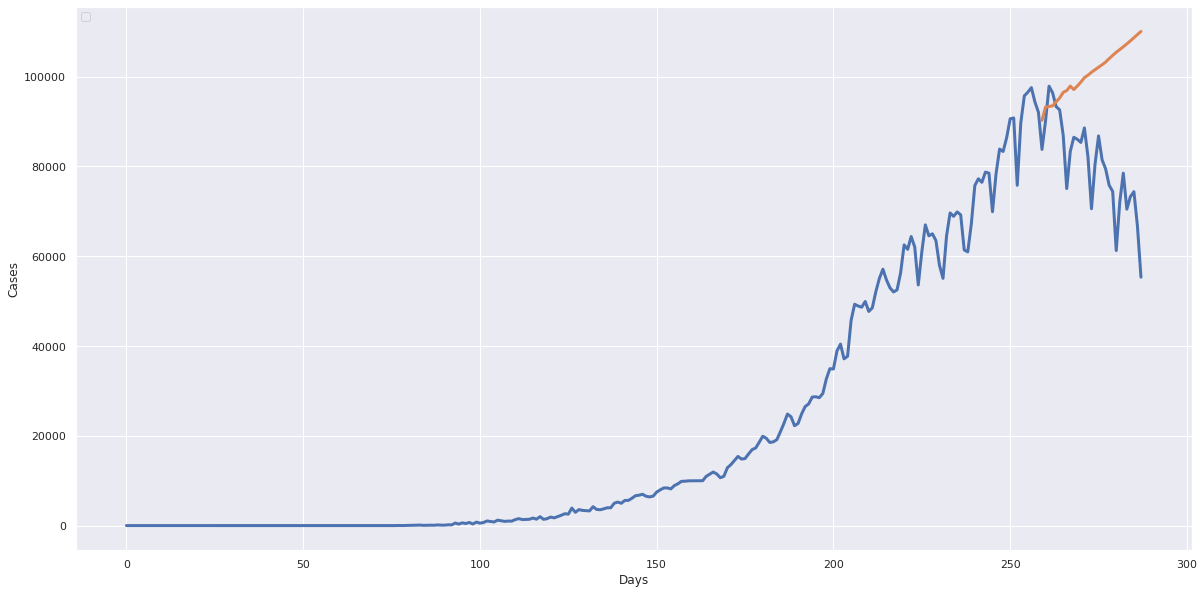

In [33]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [34]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [35]:

x_input

array([81484., 79476., 75829., 74442., 61267., 72049., 78524., 70496.,
       73272., 74383., 66732., 55342.], dtype=float32)

In [36]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>timestep):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[72362.96]
1 day input [79476.   75829.   74442.   61267.   72049.   78524.   70496.   73272.
 74383.   66732.   55342.   72362.96]
[79476.   75829.   74442.   61267.   72049.   78524.   70496.   73272.
 74383.   66732.   55342.   72362.96]
[[[79476.  ]
  [75829.  ]
  [74442.  ]
  [61267.  ]
  [72049.  ]
  [78524.  ]
  [70496.  ]
  [73272.  ]
  [74383.  ]
  [66732.  ]
  [55342.  ]
  [72362.96]]]
1 day output [[72861.31]]
2 day input [75829.   74442.   61267.   72049.   78524.   70496.   73272.   74383.
 66732.   55342.   72362.96 72861.31]
[75829.   74442.   61267.   72049.   78524.   70496.   73272.   74383.
 66732.   55342.   72362.96 72861.31]
[[[75829.  ]
  [74442.  ]
  [61267.  ]
  [72049.  ]
  [78524.  ]
  [70496.  ]
  [73272.  ]
  [74383.  ]
  [66732.  ]
  [55342.  ]
  [72362.96]
  [72861.31]]]
2 day output [[73155.41]]
3 day input [74442.   61267.   72049.   78524.   70496.   73272.   74383.   66732.
 55342.   72362.96 72861.31 73155.41]
[74442.   61267.   72049.   78524.   704

In [37]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


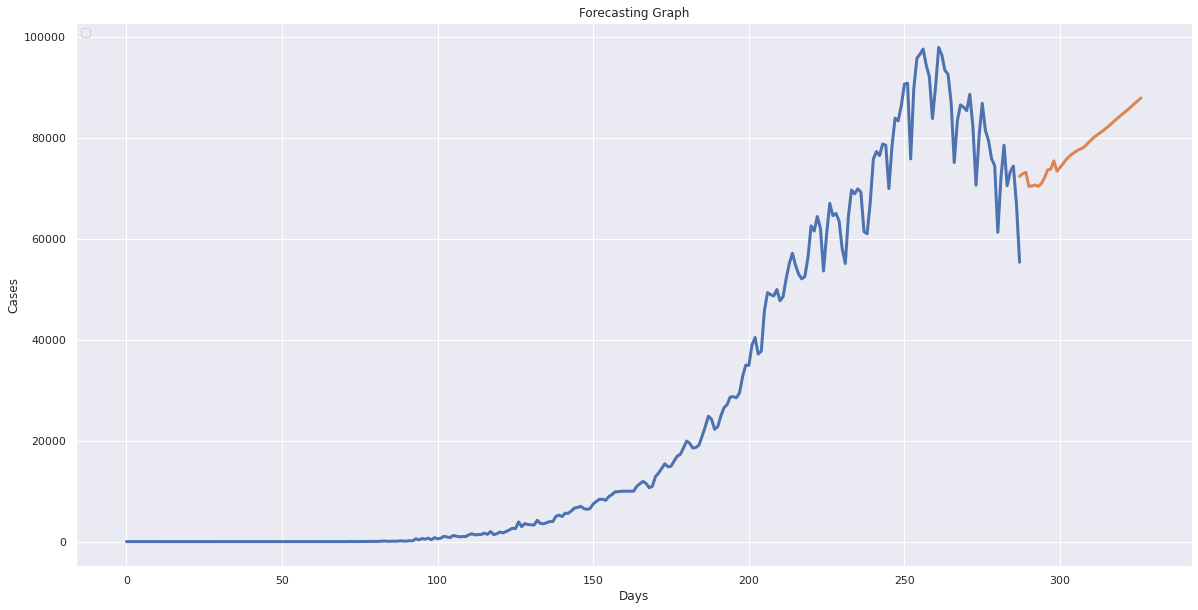

In [39]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()